In [1]:
import arviz as az
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm

# Commented out IPython magic to ensure Python compatibility.

RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
# %config InlineBackend.figure_format = 'retina'


#----


# get data
df = pd.read_csv("https://github.com/dustywhite7/Econ8310/raw/master/AssignmentData/cookie_cats.csv")
#, parse_dates=["ds"]


WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [ ]:
list(df)
df.head()
df['version'].value_counts()
df['retention_1'].mean(), df['retention_7'].mean()


In [2]:
control = df[df.version == 'gate_30']
treatment = df[df.version == 'gate_40']


In [3]:
# 1 day model

# Set up the pymc model. Again assume Uniform priors for p_A and p_B.
with pm.Model() as model:
    p_A = pm.Uniform("p_A", 0, 1)
    p_B = pm.Uniform("p_B", 0, 1)
    
    # Define the deterministic delta function. This is our unknown of interest.
    delta = pm.Deterministic("delta", p_A - p_B)

    
    # Set of observations, in this case we have two observation datasets.
    obs_A = pm.Bernoulli("obs_A", p_A, observed=control.retention_1.values)
    obs_B = pm.Bernoulli("obs_B", p_B, observed=treatment.retention_1.values)

    # To be explained in chapter 3.
    #step = pm.Metropolis()
    trace_1day = pm.sample(2000, tune=1000, chains=2)
    # if you use return_inferencedata=False, the code below will still work, but for little ArviZ, let's use the default True value.
    #burned_trace=trace[1000:]

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [p_A, p_B]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 3094 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


In [4]:
# 7 day model

# Set up the pymc model. Again assume Uniform priors for p_A and p_B.
with pm.Model() as model:
    p_A = pm.Uniform("p_A", 0, 1)
    p_B = pm.Uniform("p_B", 0, 1)
    
    # Define the deterministic delta function. This is our unknown of interest.
    delta = pm.Deterministic("delta", p_A - p_B)

    
    # Set of observations, in this case we have two observation datasets.
    obs_A = pm.Bernoulli("obs_A", p_A, observed=control.retention_7.values)
    obs_B = pm.Bernoulli("obs_B", p_B, observed=treatment.retention_7.values)

    # To be explained in chapter 3.
    #step = pm.Metropolis()
    trace_7day = pm.sample(2000, tune=1000, chains=2)
    # if you use return_inferencedata=False, the code below will still work, but for little ArviZ, let's use the default True value.
    #burned_trace=trace[1000:]

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [p_A, p_B]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 2235 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


C:\Users\T98044\AppData\Local\Temp\1\ipykernel_28248\3846065852.py:41: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


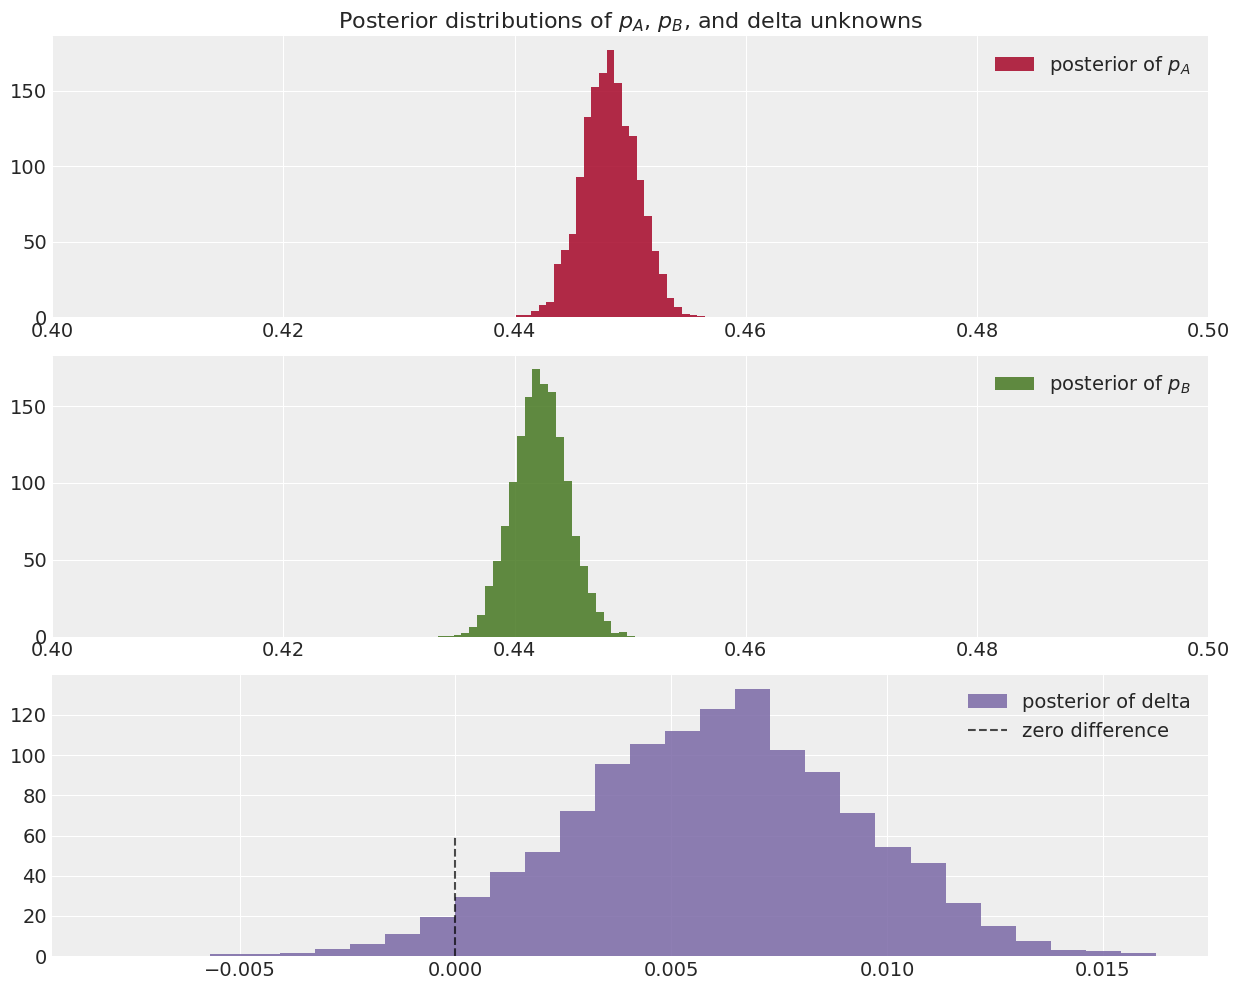

In [5]:
# plot 1 day posteriors

import matplotlib.pyplot as plt

# Extract posterior samples
p_A_samples = trace_1day.posterior["p_A"].values.flatten()
p_B_samples = trace_1day.posterior["p_B"].values.flatten()
delta_samples = trace_1day.posterior["delta"].values.flatten()

# Optional: define true values if known, or leave commented
# true_p_A = 0.05  # example value
# true_p_B = 0.04

plt.figure(figsize=(12.5, 10))

# Plot posterior of p_A
ax = plt.subplot(311)
plt.xlim(0.4, 0.5)
plt.hist(p_A_samples, bins=25, density=True, alpha=0.85, color="#A60628",
         histtype='stepfilled', label="posterior of $p_A$")
# plt.vlines(true_p_A, 0, 80, linestyle="--", label="true $p_A$ (unknown)")
plt.legend(loc="upper right")
plt.title("Posterior distributions of $p_A$, $p_B$, and delta unknowns")

# Plot posterior of p_B
ax = plt.subplot(312)
plt.xlim(0.4, 0.5)
plt.hist(p_B_samples, bins=25, density=True, alpha=0.85, color="#467821",
         histtype='stepfilled', label="posterior of $p_B$")
# plt.vlines(true_p_B, 0, 80, linestyle="--", label="true $p_B$ (unknown)")
plt.legend(loc="upper right")

# Plot posterior of delta
ax = plt.subplot(313)
plt.hist(delta_samples, bins=30, density=True, alpha=0.85, color="#7A68A6",
         histtype='stepfilled', label="posterior of delta")
plt.vlines(0, 0, 60, color="black", linestyle="--", alpha=0.7, label="zero difference")
# plt.vlines(true_p_A - true_p_B, 0, 60, linestyle="--", label="true delta (unknown)")
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

C:\Users\T98044\AppData\Local\Temp\1\ipykernel_28248\3576922694.py:41: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


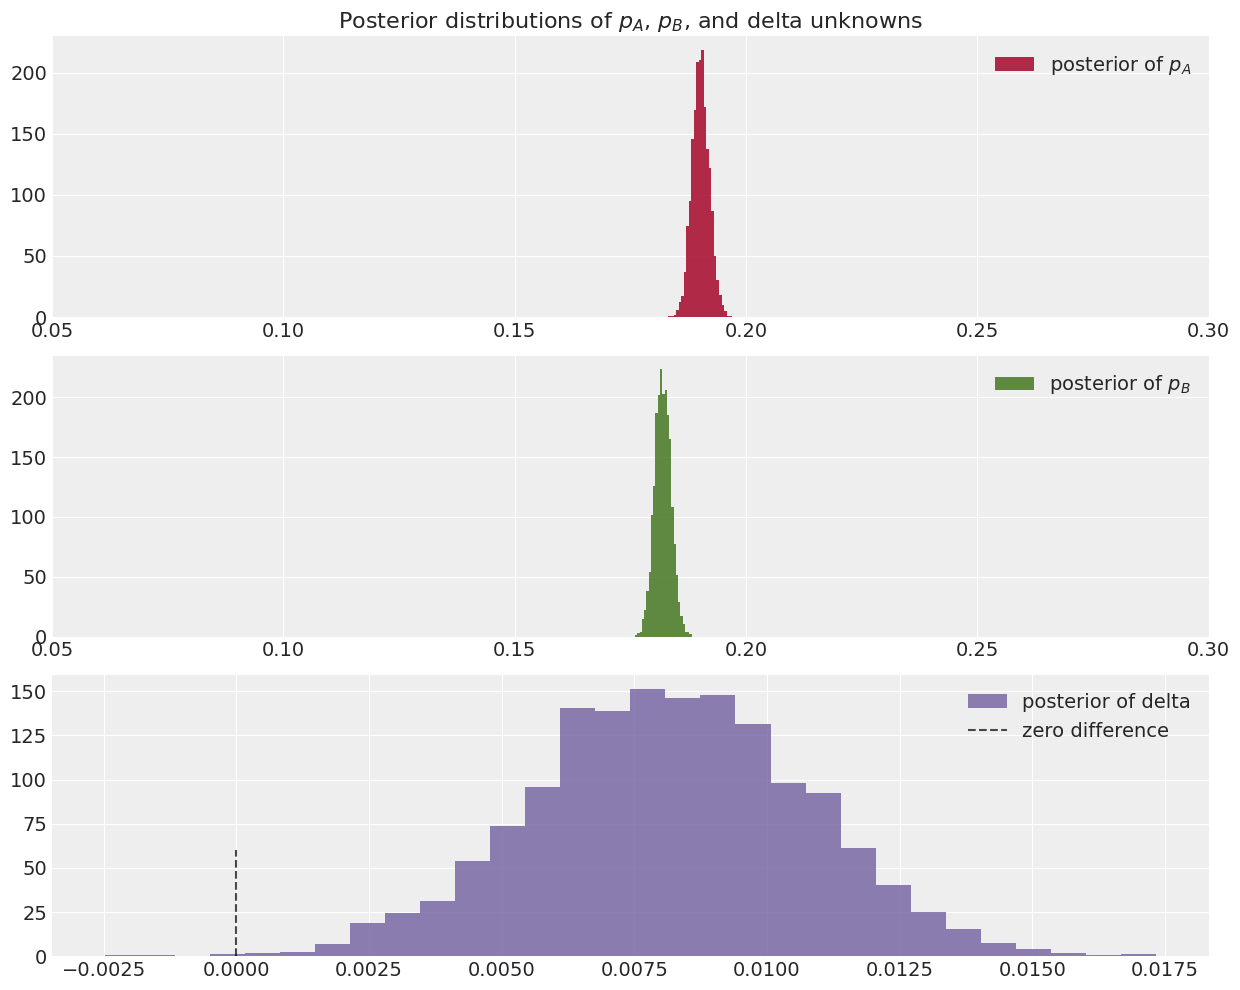

In [9]:
# plot 7 day posteriors

import matplotlib.pyplot as plt

# Extract posterior samples
p_A_samples = trace_7day.posterior["p_A"].values.flatten()
p_B_samples = trace_7day.posterior["p_B"].values.flatten()
delta_samples = trace_7day.posterior["delta"].values.flatten()

# Optional: define true values if known, or leave commented
# true_p_A = 0.05  # example value
# true_p_B = 0.04

plt.figure(figsize=(12.5, 10))

# Plot posterior of p_A
ax = plt.subplot(311)
plt.xlim(0.05, 0.3)
plt.hist(p_A_samples, bins=25, density=True, alpha=0.85, color="#A60628",
         histtype='stepfilled', label="posterior of $p_A$")
# plt.vlines(true_p_A, 0, 80, linestyle="--", label="true $p_A$ (unknown)")
plt.legend(loc="upper right")
plt.title("Posterior distributions of $p_A$, $p_B$, and delta unknowns")

# Plot posterior of p_B
ax = plt.subplot(312)
plt.xlim(0.05, 0.3)
plt.hist(p_B_samples, bins=25, density=True, alpha=0.85, color="#467821",
         histtype='stepfilled', label="posterior of $p_B$")
# plt.vlines(true_p_B, 0, 80, linestyle="--", label="true $p_B$ (unknown)")
plt.legend(loc="upper right")

# Plot posterior of delta
ax = plt.subplot(313)
plt.hist(delta_samples, bins=30, density=True, alpha=0.85, color="#7A68A6",
         histtype='stepfilled', label="posterior of delta")
plt.vlines(0, 0, 60, color="black", linestyle="--", alpha=0.7, label="zero difference")
# plt.vlines(true_p_A - true_p_B, 0, 60, linestyle="--", label="true delta (unknown)")
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

In [8]:
print(p_A_samples)

[0.18920581 0.19029167 0.19064801 ... 0.19172915 0.18884317 0.18780387]
